# <center>Tarea 3<center>
# <center>Para entregar el 29 de octubre<center>

## 1. ¿Qué es Batch normalization? Escribe un reporte breve explicando qué es, para qué sirve y cómo se realiza. Incluye ejemplos ilustrativos (sencillos).

### <font color=green>Tu respuesta aquí</font>

La normalización por Batches es un método propuesto por Ioffe and Szegedy en el año 2015, y que busca resolver el problema de la lentitud del entrenamiento de redes neuronales debido al cambio de distribución de los datos de salida en cada una de las capas de la red. Este problema es conocido como el _cambio de covarianza interna_ y provoca que se tengan que elegir tasas de aprendizaje muy pequeñas y se deba cuidar la inicialización de los parámetros, haciendo muy lento el proceso de aprendizaje de la red. 

La solución que propuseron Ioffe y Szegedy, es la __normalización de las entradas de las capas para cada mini-batch de entrenamiento__, que implica mantener estas entradas con una media 0 y una desviación estándar de 1.

Esto se realiza de la siguiente manera: Para una capa con entradas d-dimensional $x=(x^{(1)},...,x^{(d)})$, se normaliza cada dimensión de acuerdo a la media y varianza calculada para el conjunto de entrenamiento:

$\hat x^{(k)}=\frac{x^{(k)}-E(x^{(k)})}{\sqrt{\text{Var}[x^{(k)}]}}$

Dado que esta normalización puede cambiar el significado del resultado de ciertas capas, entonces se introdujeron para cada activación dos parámetros $\gamma^{(k)}$ y $\beta^{(k)}$ que se pudieran aprender a la par de los parámetros originales del modelo y que normalizaran el valor de salida:

$y^{(k)}=\gamma^{(k)}\hat x^{(k)} + \beta^{(k)}$

Esto permitiría recuperar las activaciones originales, si se ajustan de la siguiente manera:

$\gamma^{(k)}=\sqrt{\text{Var}[x^{(k)}]}$ y $\beta^{(k)}=E[x^{(k)}]$.

Cuando se utilizan mini-batches, cada uno de ellos produce estimados de la media y la varianza de cada activación, de manera que se puedan utilizar todas en el proceso de aprendizaje. 

El proceso de Normalización por Batch se puede resumir de la siguiente manera:
1. Dado un conjunto de datos $x$, pertenecientes a un batch, se calculan sus parámetros de media y desviación estándar.
2. Se obtiene el estimador $\hat x$, que es la normalización de los datos originales, con la media y la desviación estándar obtenidas anteriormente.
3. Se escala el estimador y se obtiene la salida de la capa de acuerdo a la siguiente ecuación:

$y^{(k)}=\gamma^{(k)}\hat x^{(k)} + \beta^{(k)}$.

Para ilustrar mejor las ventajas de utilizar la normalización por batch se utiliza un ejemplo sintético en dos redes sencillas, una con y otra sin normalización por batch.

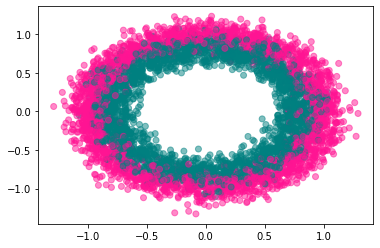

In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#Se genera el conjunto de datos sintético
X, y = make_circles(n_samples=5000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}
plt.scatter(X[:,0], X[:,1], c=[c_map[i] for i in y], alpha=0.5)
plt.show()


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,Conv3D
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import RMSprop, SGD

y_bin=to_categorical(y_train)
y_bint=to_categorical(y_test)

#Modelo Baseline con dos capas
baseline = Sequential()
baseline.add(Dense(50,input_dim=2,activation='relu'))
baseline.add(Dense(2,activation='sigmoid'))
baseline.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [3]:
history_baseline = baseline.fit(X_train, y_bin, validation_data=(X_test, y_bint), epochs=50, verbose=0)

In [4]:
#Modelo Baseline evaluado en el conjunto de entrenamiento
baseline.evaluate(X_train,y_bin)

110/110 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7931


[0.6586912870407104, 0.7931428551673889]

In [5]:
#Modelo baseline evaluado con el conjunto de prueba
baseline.evaluate(X_test,y_bint)

47/47 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.8080


[0.6564744114875793, 0.8080000281333923]

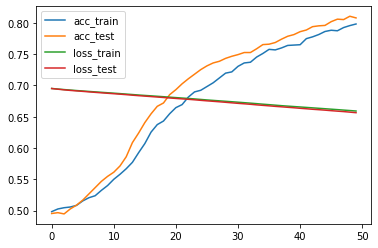

In [6]:
#Se visualizan las métricas del modelo baseline
plt.plot(history_baseline.history['accuracy'], label='acc_train')
plt.plot(history_baseline.history['val_accuracy'], label='acc_test')
plt.plot(history_baseline.history['loss'], label='loss_train')
plt.plot(history_baseline.history['val_loss'], label='loss_test')
plt.legend()
plt.show()

Comparamos el mismo modelo, solo agregando la normalización por Batch

In [7]:
model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_bin, validation_data=(X_test, y_bint), epochs=50, verbose=0)

In [9]:
#Modelo con NormBatch evaluado en el conjunto de entrenamiento
model.evaluate(X_train,y_bin)

110/110 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8306


[0.37458911538124084, 0.8305714130401611]

In [10]:
#Modelo con NormBatch evaluado en el conjunto de prueba
model.evaluate(X_test,y_bint)

47/47 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8427


[0.3527630567550659, 0.8426666855812073]

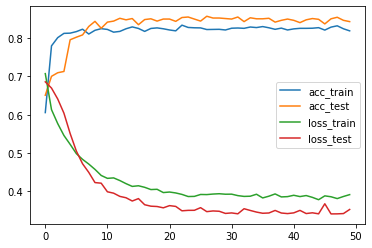

In [11]:
#Se visualizan las métricas del segundo modelo.
plt.plot(history.history['accuracy'], label='acc_train')
plt.plot(history.history['val_accuracy'], label='acc_test')
plt.plot(history.history['loss'], label='loss_train')
plt.plot(history.history['val_loss'], label='loss_test')
plt.legend()
plt.show()

El segundo modelo presentó una notable mejoría en la métrica de precisión al agregar únicamente la normalización por Batch entre ambas capas del modelo. En el caso del conjunto de entrenamiento pasó del 79.31% al 83.06%, mientras que en el conjunto de prueba de 80.80% a 84.26% con una función de pérdida que se redujo a casi la mitad con el segundo modelo. 

## 2. Dados los siguientes parámetros para algún eje (canal) de un tensor:

### - $i$: tamaño de los datos de entrada (cuadradas: $i_1=i_2=i$) 
### - $k$: tamaño de un kernel de convolución cuadrado
### - $s$: tamaño de stride (igual en ambas direcciones)
### - $p$: zero padding (igual en ambas direcciones)

## obtén una expresión para calcular:
## a) el tamaño de salida del mapeo luego de realizar una convolución.
## b) el tamaño de salida del proceso de pooling

### <font color=green>Tu respuesta aquí</font>

__a) El tamaño de salida del mapeo luego de realizar una convolución__
Tomando en cuenta una sola dirección de los datos, debido a que estamos considerando datos cuadrados, es decir, que para ambas direcciones será el mismo resultado: Sabemos que en este caso depende directamente del tamaño de los datos de entrada _i_, que van a ser leídos por un kernel tamaño _k_, por lo que hasta ahora depende de cuántas veces podríamos mover el kernel en todo el tensor (en una dirección). Al tamaño _i_ simplemente se suma el valor del _zero padding_ dos veces ya que se agregan a ambos extremos del tensor. Dado que el stride es la cantidad que divide nuestro tensor en ciertas secciones que sí serán leídas por el kernel, entonces el tamaño de salida del mapeo estará dado por la siguiente ecuación:

$o=\frac{i-k+2p}{s}+1$

__b) El tamaño de salida del proceso de pooling__, para calcular esto hay que tener en cuenta que no se realiza zero padding en esta capa, y se utiliza un filtro que puede ser distinto al kernel, lo definimos como:

- $f$ - Filtro utilizado en la capa de pooling.
 
Dado que es común que el tamaño de filtro y el de stride sean el mismo, la expresión a continuación se puede simplificar con $f=s$, sin embargo se muestra con $f$ para un resultado más general:

$\text{pool}=\frac{i-f}{s}+1$.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
os.chdir('/content/drive/My Drive/')
path='Data_Wildlife/wildlife'
os.listdir(path)

['virginia_opossum',
 'nutria',
 'seals',
 'mountain_beaver',
 'gray_wolf',
 'red_fox',
 'ringtail',
 'sea_lions',
 'raccoon',
 'raven',
 'deer',
 'black_bear',
 'bobcat',
 'elk',
 'canada_lynx',
 'cougar',
 'columbian_black-tailed_deer',
 'bald_eagle',
 'coyote',
 'gray_fox']

## 3. En el archivo `wildlife.tar.gz`, se encuentra un conjunto pequeño de imágenes de distintos animales salvajes, con la siguiente distribución;

In [14]:
import cv2
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

labels = os.listdir(path)
print("Categorias:", len(labels))

total = 0
for lb in os.scandir(path):
    print('folder {}: imagenes {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total de imagenes:', total)


Categorias: 20
folder virginia_opossum: imagenes 728
folder nutria: imagenes 701
folder seals: imagenes 698
folder mountain_beaver: imagenes 577
folder gray_wolf: imagenes 730
folder red_fox: imagenes 768
folder ringtail: imagenes 601
folder sea_lions: imagenes 726
folder raccoon: imagenes 736
folder raven: imagenes 656
folder deer: imagenes 764
folder black_bear: imagenes 718
folder bobcat: imagenes 696
folder elk: imagenes 660
folder canada_lynx: imagenes 717
folder cougar: imagenes 680
folder columbian_black-tailed_deer: imagenes 739
folder bald_eagle: imagenes 748
folder coyote: imagenes 736
folder gray_fox: imagenes 668
Total de imagenes: 14047


#### De las 20 etiquetas, nos enfocaremos en 5 de ellas: `deer`, `red fox`, `bald eagle`, `gray wolf` y `coyote`. Para facilitarte el ejercicio, he preparado dos archivos con los datos de las imágenes de éstas 5 categorias. En  `imagenes_info_train.csv` e `imagenes_info_test.csv`, se encuentra la información de las imágenes de entrenamiento y prueba, respectívamente. En cada uno, encontrarás el nombre de la imagen y su categoría correspondiente. Una muestra de las imágenes de entrenamiento es la siguiente.

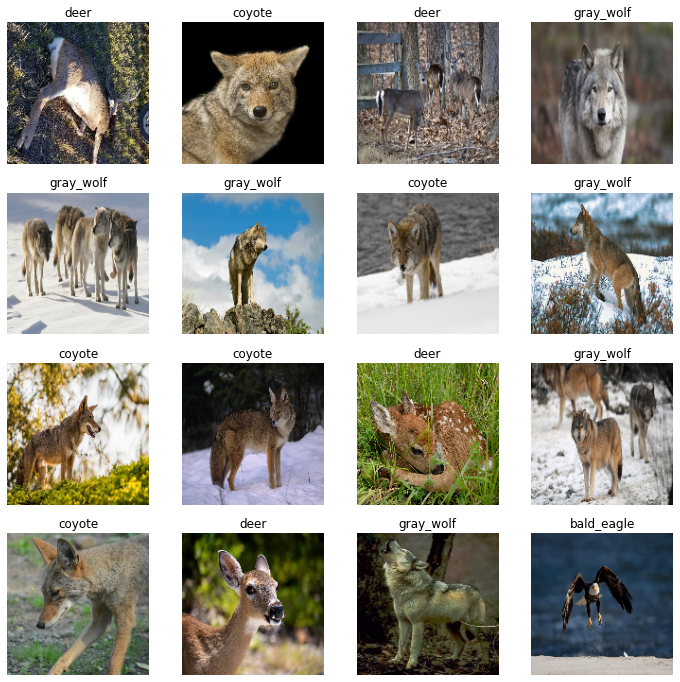

In [15]:
def plot_sample(imgs_set, labels_set, img_size=(12,12), columns=4, rows=4, random=False):
    """
    Plot a sample of images
    """
    
    fig=plt.figure(figsize=img_size)
    
    for i in range(1, columns*rows + 1):
        
        if random:
            img_x = np.random.randint(0, len(imgs_set))
        else:
            img_x = i-1

        img = imgs_set[img_x]
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(str(labels_set[img_x]))
        plt.axis('off')
        im = cv2.imread(img)
        im_resized = cv2.resize(im, (150, 150), interpolation=cv2.INTER_LINEAR)
        plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

traindf=pd.read_csv('Data_Wildlife/imagenes_info_train.csv',dtype=str)
testdf=pd.read_csv('Data_Wildlife/imagenes_info_test.csv',dtype=str)

## grafica algunas imagenes de prueba
plot_sample(traindf.iloc[:,0],traindf.iloc[:,1],random=True)
   

#### en la siguiente celda, verás la implementación y resultados de un modelo 'simple'

In [16]:
# data generators
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import time

minibatch_size = 20
n_classes = 5
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

# funcion para verificar el tiempo transcurrido
def elapsed(start):
    # Returns elapsed time in hh:mm:ss format from start time in unix format
    elapsed = time.time()-start
    return time.strftime("%H:%M:%S", time.gmtime(elapsed))

train_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="validation",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    x_col="filename",
    y_col='label',
    batch_size=minibatch_size,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150))

Found 2536 validated image filenames belonging to 5 classes.
Found 634 validated image filenames belonging to 5 classes.
Found 560 validated image filenames belonging to 5 classes.


In [17]:
# un modelo 'simple'
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu')) # CHECAR LAS UNIDADES!!!!!
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [18]:
start = time.time()
history = model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=50,
      verbose = 1)
print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/50
100/100 [==============================] - 56s 564ms/step - loss: 1.2923 - accuracy: 0.4003 - val_loss: 4.9660 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 55s 547ms/step - loss: 1.0453 - accuracy: 0.5506 - val_loss: 6.1400 - val_accuracy: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 56s 558ms/step - loss: 0.9440 - accuracy: 0.6052 - val_loss: 5.4053 - val_accuracy: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 56s 564ms/step - loss: 0.8667 - accuracy: 0.6390 - val_loss: 5.3908 - val_accuracy: 0.0000e+00
Epoch 5/50
100/100 [==============================] - 56s 559ms/step - loss: 0.8288 - accuracy: 0.6643 - val_loss: 4.9196 - val_accuracy: 0.0000e+00
Epoch 6/50
100/100 [==============================] - 56s 560ms/step - loss: 0.7766 - accuracy: 0.6829 - val_loss: 5.1265 - val_accuracy: 0.0000e+00
Epoch 7/50
100/100 [==============================] - 56s 558ms/step - loss: 0.7430 - accuracy: 0.6984 - v

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
model.save('Data_Wildlife/model_baseline1.h5')

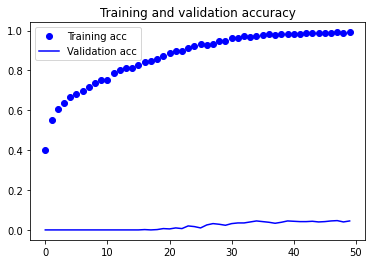

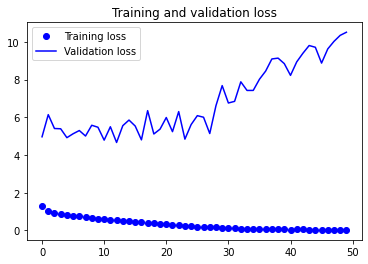

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 11s 401ms/step - loss: 2.6177 - accuracy: 0.7446
test acc: 0.7446428537368774


### a) Toma el resultado anterior como tu Baseline. El objetivo es superar ése baseline. Para esto, aplica TODO lo que has aprendido hasta ahora, buscando un modelo que tenga un buen error de generalización y una buena precisión (al menos, mejor que tu baseline). Para esto, usa Transfer Learning con algún modelo pre-entrenado de Keras (VGG16, VGG19, Xception, InceptionV3, ResNet50, MobileNet, etc), así como los métodos de regularización que conoces.
  ### Explica todos los pasos y detalles de tu arquitectura.
  ### EL MODELO GANADOR, TENDRÁ UNA BUENA RECOMPENSA

In [22]:
from keras.applications import Xception,VGG16,VGG19,InceptionV3,ResNet50,MobileNet

In [23]:
tl_base = Xception(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

In [24]:
tl_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [25]:
my_model = Sequential()
my_model.add(tl_base)
my_model.add(Flatten())
my_model.add(Dense(256, activation='relu'))
my_model.add(Dropout(0.1))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.1))
my_model.add(Dense(5, activation='softmax'))
my_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(),
              metrics=['accuracy'])

In [26]:
tl_base.trainable = False

In [27]:
start = time.time()
my_history = my_model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, 
      validation_steps= 30, 
      initial_epoch = 0,
      epochs=50,
      verbose = 1)
print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/50
100/100 [==============================] - 64s 637ms/step - loss: 0.7206 - accuracy: 0.7199 - val_loss: 4.6579 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 63s 628ms/step - loss: 0.3216 - accuracy: 0.8848 - val_loss: 3.1220 - val_accuracy: 0.0100
Epoch 3/50
100/100 [==============================] - 62s 617ms/step - loss: 0.1767 - accuracy: 0.9404 - val_loss: 3.6323 - val_accuracy: 0.0250
Epoch 4/50
100/100 [==============================] - 63s 633ms/step - loss: 0.1080 - accuracy: 0.9669 - val_loss: 3.2932 - val_accuracy: 0.0967
Epoch 5/50
100/100 [==============================] - 63s 632ms/step - loss: 0.0794 - accuracy: 0.9795 - val_loss: 2.9805 - val_accuracy: 0.1617
Epoch 6/50
100/100 [==============================] - 62s 621ms/step - loss: 0.0671 - accuracy: 0.9765 - val_loss: 2.8792 - val_accuracy: 0.2250
Epoch 7/50
100/100 [==============================] - 61s 608ms/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 2.6531 - va

In [ ]:
#model.save('Data_Wildlife/my_model.h5')

In [ ]:
from keras.models import load_model
my_model = load_model('/content/drive/My Drive/Data_Wildlife/my_model.h5')

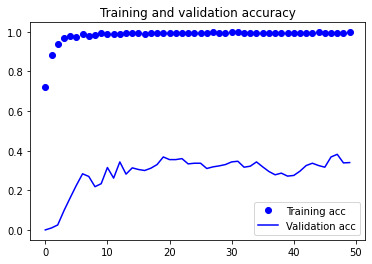

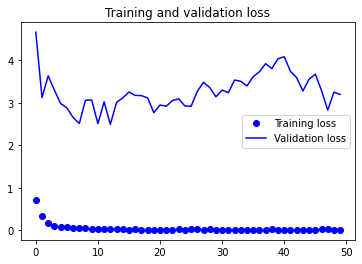

In [28]:
acc = my_history.history['accuracy']
val_acc = my_history.history['val_accuracy']
loss = my_history.history['loss']
val_loss = my_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_my_loss, test_my_acc = my_model.evaluate(test_generator)
print('test acc:', test_my_acc)

28/28 [==============================] - 12s 422ms/step - loss: 0.8626 - accuracy: 0.8196
test acc: 0.8196428418159485


Se logró una mejoría notable con respecto al modelo base utilizado. Cabe destacar que se probaron múltiples opciones que consideraban un mayor número de capas, sin embargo lo que se observó fue que el parámetro más importante fue la regularización que se tenía sobre cada una de las capas. De esta manera utilizando una regularización tipo dropout más agresiva se podían obtener resultados similares con modelos más simples. Es por esto que se decidió por el modelo presentado anteriormente.

### b) Usando las capas de convolución de tu modelo, obtén las representaciones (embeddings) de las imágenes de prueba, es decir, al salir de la última capa de convolución. Obtén una visualización de éstas representaciones con algún método de reducción de dimensión (PCA, tSNE). ¿Encuentras patrones interesantes?

La última capa de convolución que se utiliza pertenece al modelo base utilizado con transfer learning (Xception). Se muestra primero a continuación uno de los filtros que utiliza esta última capa de nuestro modelo base Xception.

In [31]:
from tensorflow import keras
img_width = 150
img_height = 150
layer_name = "conv2d_7"
layer = tl_base.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=tl_base.inputs, outputs=layer.output)

In [32]:
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img
def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

In [33]:
from IPython.display import Image, display

loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("/content/drive/My Drive/Data_Wildlife/0.png", img)

Se muestra el primer filtro aplicado en la última capa de convolución.

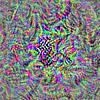

In [34]:
display(Image("/content/drive/My Drive/Data_Wildlife/0.png"))

Se muestra una de las imágenes de prueba y el resultado de pasar esta imagen por algunos de los filtros que se utilizan en la última capa de convolución. Después se crea un arreglo con todas las representaciones obtenidas con las imágenes de prueba después de pasar por los filtros de esta última capa y a este arreglo se le aplica PCA para la reducción de dimensionalidad.

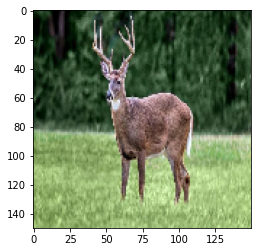

In [35]:
img_path = '/content/drive/My Drive/'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path+testdf.iloc[0,0], target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [36]:
img_tensor.shape

(1, 150, 150, 3)

In [37]:
activations = feature_extractor.predict(img_tensor)

Imagen de prueba bajo el filtro número 3.

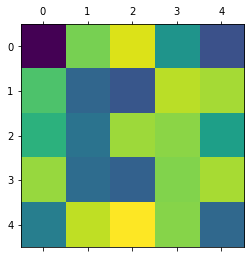

In [38]:
plt.matshow(activations[0, :, :, 3], cmap='viridis')
plt.show()

Imagen de prueba bajo el filtro 1020 de esta última capa.

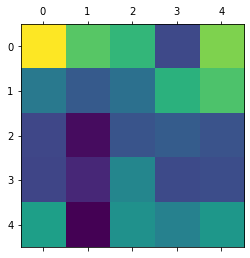

In [39]:
plt.matshow(activations[0, :, :, 1020], cmap='viridis')
plt.show()

Preparamos el arreglo con las representaciones de salida de las imágenes de prueba.

In [40]:
test_act=np.zeros((561,1*5*5*1024))
for i in range(561):
  img = image.load_img(img_path+testdf.iloc[i,0], target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255
  activation = feature_extractor.predict(img_tensor)
  act_reshape=np.reshape(activation,(1,1*5*5*1024))
  test_act[i,:]=act_reshape

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

X = StandardScaler().fit_transform(test_act)
pca = PCA(n_components=50)
pca.fit(X)
proj = pca.transform(X)

Se visualizan los primeros componentes principales de estas representaciones

In [42]:
import plotly.express as px
import pandas as pd

pca_dataset = pd.DataFrame({'pc1': proj[:, 0], 'pc2': proj[:, 1],'pc3': proj[:, 2], 'Animal': testdf.iloc[:,1]})

fig=px.scatter(pca_dataset, x='pc1', y='pc2', color='Animal',hover_data=['Animal'])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

Se visualizan el 1° y el 3° componente principal.

In [43]:
fig=px.scatter(pca_dataset, x='pc1', y='pc3', color='Animal',hover_data=['Animal'])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

Se visualizan el 2° y el 3° componente principal.

In [44]:
fig=px.scatter(pca_dataset, x='pc2', y='pc3', color='Animal',hover_data=['Animal'])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [45]:
from sklearn.manifold import TSNE

np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'Animal': testdf.iloc[:,1]})

fig = px.scatter(tsne_dataset, x='pc1', y='pc2', color='Animal', hover_data=['Animal'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

A través del enfoque clásico de reducción de dimensión no se observan patrones interesantes que nos permitan distinguir entre una y otra de las especies de interés. Para el caso de componentes principales (PCA), primero se visualizaron los 10 componentes principales y al no verse ningún patrón claro para ningún par de componentes se mostraron únicamente los 3 primeros para simplicidad del reporte. En estos tres gráficos se puede observar que no hay patrones o tendencias que nos permitan agrupar a las especies correctamente de acuerdo a estas representaciones obtenidas en la última capa de salida. De igual manera bajo el método tSNE, no fue posible visualizar características en común entre las especies de acuerdo a los componentes principales obtenidos. Una de las razones por las que se cree se obtuvo este resultado es la complejidad y la gran cantidad de filtros que se utilizan en la última capa de convolución, lo que es muy difícil representar en tan pocas dimensiones. Además de que en el caso de redes la posición de los pixeles en dos dimensiones tiene una gran importancia y peso al obtener estas representaciones en la salida de la capa de convolución, algo que no se aprovecha o explota completamente utilizando métodos clásicos de reducción de dimensionalidad.  